# Teraquop fit plots

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from typing import Optional, List

import sinter
import rsmf

formatter : plt.Figure = rsmf.setup(r"\documentclass[a4paper,11pt,noarxiv]{quantumarticle}")
%matplotlib inline


In [12]:
def filter_stats(stats, metadeta_entries: dict() = None, decoder = None):
    for metadeta_key, metadeta_value in metadeta_entries.items():
        stats = [stat for stat in stats if stat.json_metadata[metadeta_key] == metadeta_value]
    if decoder:
        stats = [stat for stat in stats if stat.decoder == decoder]
    return stats


In [13]:
stats : List[sinter.TaskStats] = sinter.stats_from_csv_files('./out/data/memory_0.001.csv')
stats += sinter.stats_from_csv_files('./out/data/stability_0.001.csv')
filter_dictionary = {'per': 0.001, 'gf_0': 1, 'gf_1': 1, 'gf_2': 0, 'pm': 1.0, 'px': 1.0, 'pz': 1.0, 'py': 1.0}
stats = filter_stats(stats, metadeta_entries = filter_dictionary, decoder='pymatching')

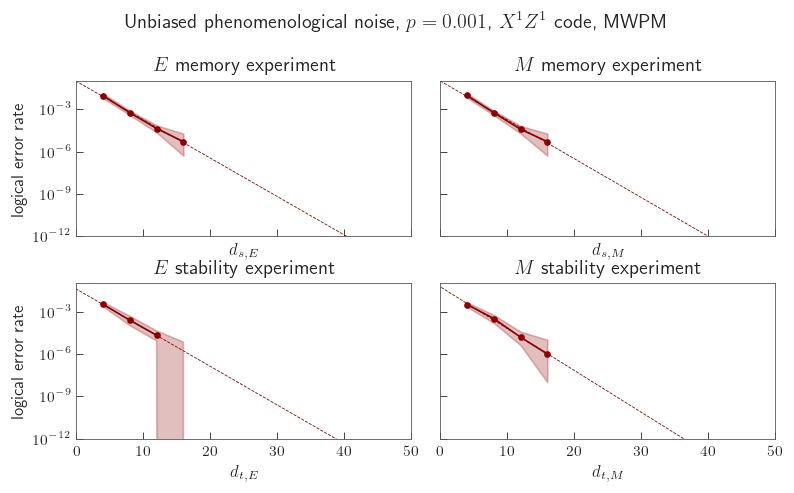

In [15]:
fig = formatter.figure(wide=True)
axes = fig.subplots(2,2, sharey=True, sharex=True)
plot_args_func = lambda index, curve_id: {'color': 'darkred'}

x_axis_func = lambda stat: stat.json_metadata['distance']

observables = ['memory_x', 'memory_z', 'stability_x', 'stability_z']
x_labels = ['$d_{s,E}$', '$d_{s,M}$', '$d_{t,E}$', '$d_{t,M}$']
plot_titles = ['$E$ memory experiment', '$M$ memory experiment', '$E$ stability experiment', '$M$ stability experiment']
for ax, ob, x_label, plot_title in zip(axes.flatten(), observables, x_labels, plot_titles):
    sinter.plot_error_rate(ax=ax,  
                            stats=stats,
                            x_func= x_axis_func,
                            filter_func= lambda stat: stat.json_metadata['logical_observable'] == ob,
                            plot_args_func=plot_args_func,
                            line_fits=('linear', 'log')
        )
    ax.set_xlabel(x_label)
    ax.set_yscale('log')
    ax.set_ylim(1e-12, 1e-1)
    ax.set_xlim(0, 50)
    ax.set_title(plot_title)

fig.suptitle('Unbiased phenomenological noise, $p=0.001$, $X^1Z^1$ code, MWPM')

axes[0][0].set_ylabel('logical error rate')
axes[1][0].set_ylabel('logical error rate')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig(f"plots/X1Y1Z1_X1Z1_teraquop_linefits.pdf", bbox_inches='tight')
plt.show()
